Networkx is a python module used for creating network graphs and finding out information about how the each node in the graph relates to each other. We in this project will be using it to visualize the relationships between the Stark family members , the Lannister family members , and last the relationships between each family.

In [2]:
#Load and inspect the first 5 rows of the edges for season 1
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
Lannisters = ['TYRION','TYWIN','CERSEI','JAIME']
Starks = ['NED', 'CATELYN', 'ROBB','JON','SANSA','ARYA']
Main_Char = Lannisters + Starks


S1 = pd.read_csv('gameofthrones/data/got-s1-edges.csv')
S1.head(5)

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


----

In [3]:
# Create a graph object and iterate throw the rows of the season 1 dataframe to add edges to graph
G_S1 = nx.Graph()

for _ , edge in S1.iterrows():
    G_S1.add_edge(edge['Source'], edge['Target'] , weight=edge['Weight'], season='1')
G_S1

## Apply  Networking Analysis to Season 1

We are going to create a network graph for season 1 , and then apply the same logic to all seasons at once. 

61.0


/home/adam/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


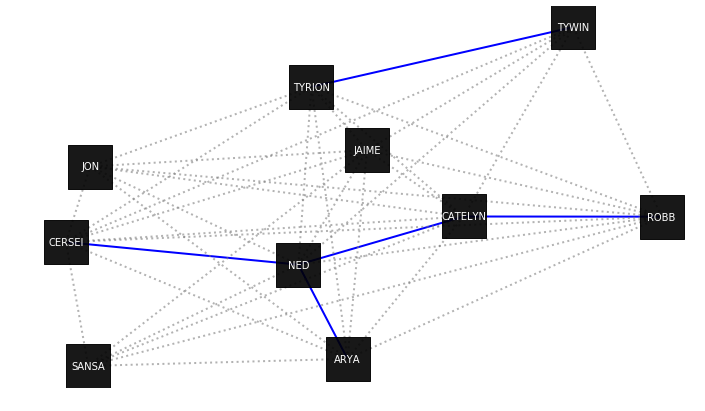

[('ROBB', 'CATELYN', {'weight': 90, 'season': '1'}),
 ('ROBB', 'JON', {'weight': 25, 'season': '1'}),
 ('ROBB', 'NED', {'weight': 23, 'season': '1'}),
 ('ROBB', 'TYRION', {'weight': 16, 'season': '1'}),
 ('ROBB', 'JAIME', {'weight': 10, 'season': '1'}),
 ('ROBB', 'SANSA', {'weight': 9, 'season': '1'}),
 ('ROBB', 'CERSEI', {'weight': 8, 'season': '1'}),
 ('ROBB', 'ARYA', {'weight': 6, 'season': '1'}),
 ('ROBB', 'TYWIN', {'weight': 5, 'season': '1'}),
 ('CERSEI', 'NED', {'weight': 86, 'season': '1'}),
 ('CERSEI', 'JAIME', {'weight': 46, 'season': '1'}),
 ('CERSEI', 'SANSA', {'weight': 36, 'season': '1'}),
 ('CERSEI', 'CATELYN', {'weight': 22, 'season': '1'}),
 ('CERSEI', 'TYRION', {'weight': 18, 'season': '1'}),
 ('CERSEI', 'ARYA', {'weight': 9, 'season': '1'}),
 ('CERSEI', 'JON', {'weight': 3, 'season': '1'}),
 ('CERSEI', 'TYWIN', {'weight': 3, 'season': '1'}),
 ('CATELYN', 'NED', {'weight': 69, 'season': '1'}),
 ('CATELYN', 'TYRION', {'weight': 41, 'season': '1'}),
 ('CATELYN', 'JAIME'

In [4]:
H = G_S1.subgraph(Main_Char)
def checkInteract(s , t):
    if s in Starks and t in Starks:
        return 0
    elif s in Lannisters and t in Lannisters:
        return 1
    else:
        return 3
pos = nx.spring_layout(H, scale=3)
max_weight = max(dict(H.edges).values() , key=lambda x: x['weight'])['weight']
weights = np.array([(H[u][v]['weight']) for u,v in H.edges()])
p95 = np.floor(np.percentile(weights , 90))
print(p95)    
plt.figure(figsize=(12,7))
nx.draw_networkx_nodes(H, pos, node_size=2000, node_shape='s', alpha=.9, node_color='black')
elarge = [(u, v) for (u, v, d) in H.edges(data=True) if d['weight'] >=p95]
emedium = [(u, v) for (u, v, d) in H.edges(data=True) if d['weight'] <p95]
nx.draw_networkx_edges(H, pos, edgelist=elarge,width=2 , alpha=1 , edge_color='b')
nx.draw_networkx_edges(H, pos, edgelist=emedium,width=2, alpha=.6, edge_color='grey', style='dotted')
nx.draw_networkx_labels(H, pos, font_size=10, font_color='w')
plt.axis('off')
plt.show()
[(u,v,d) for (u, v, d) in H.edges(data=True)]

## Starks vs Starks


We defined important relationships to be any relationship between 2 characters that has as a frequency of interactions equal to the range in the top 10% of the range of all relationship interactions involving all 7 seasons. In this graph only the important relationships are shown for all seasons, however, because the seaosons are not garuanteed to contain a relationship that has an interaction amount in the top 10% range some seasons may be missing. 

The blue line shows us the flow of important(highly frequent) relationships in season 1. The first thing you notice is what every Stark but Jon is connected. This further emphasizes Jon's role as a loner that has no important relationships with his family in season 1. Another observation is how exactly the other Starks are conncted by the blue line. Besides the parents connection with each other , Ned is connected only to Arya and Catelyn is connected only to Robb. And of the children , only Arya and Sansa are connected. So Ned does not interact to a high degree with Sansa or Robb, and Cateyln does not interact to a high degree with Arya or Sansa. If we cross refference this with the actual locations of the characters in season 1 Cateyln's lack of important relationships with Sansa and Arya make sense as they are often in Kings Landing, while she is traveling around Westeros as a whole. Ned similarly is always in Kings landing so talking to Robb is out of the question. However , Ned and Sansa are in the same location so the lack of a connection is telling on Ned's prefference for Arya. 

The red line shows us the flow of important (highly frequent) relationships in season 2. As we can see the number of important connections drastically reduced in season 2 from 4 to just 1. This one is between Catelyn and Robb. Season 2 is when the war of the 5 kings started after Ned's death , and as far as the tarks are concerned it mainly focused on the North led by Robb. 

--
We skip seasons 4 and 5. It is presummed that these seasons were more about the Lannisters, but we would have to analyze the Lannisters first.  The grey line shows us the flow of important (highly frequent) realtionships in season 6. Once again the number of connections is only 1, which is Jon and Sansa. This can be explained as this is when in the story both character's story converges. The moment is also worth focusing on because it is the first time Jon ever connected on the graph with any other Stark, which symbolizes in the story Jon's growth from a black sheep to a part of the Stark herd. 

Lastly the yellow line shows us the flow of important (highly frequent) relationships in season 7. Once again there is a connection between Jon and Sansa , but now Arya has come home as well. It is important to note that Arya does not connect with Jon. Truthfully , Arya's character journey is more about her contrast with Sansa, and it is poetic that seasoon 7 mirrors season 1 for them. From season 1 to season 7 , the narrative focus on the Starks transitions from Parent-Parent , to Parent-Child and eventually from Sibling-Sibling. As this transition happened the connections traveled slowly reaching Jon. 


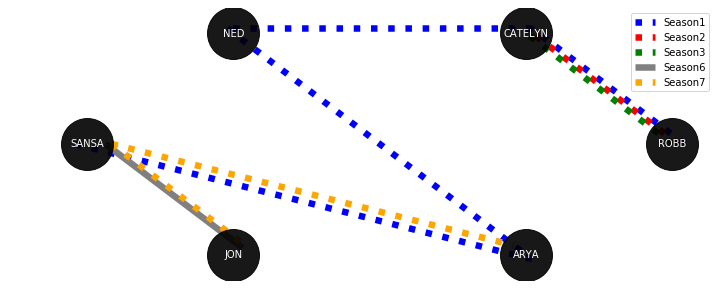

[[('ROBB', 'CATELYN'), ('CATELYN', 'NED'), ('NED', 'ARYA'), ('SANSA', 'ARYA')],
 [('ROBB', 'CATELYN')],
 [('ROBB', 'CATELYN')],
 [],
 [],
 [('SANSA', 'JON')],
 [('SANSA', 'JON'), ('SANSA', 'ARYA')]]

In [5]:


Slist= ['gameofthrones/data/got-s1-edges.csv','gameofthrones/data/got-s2-edges.csv', 'gameofthrones/data/got-s3-edges.csv','gameofthrones/data/got-s4-edges.csv', 
 'gameofthrones/data/got-s5-edges.csv', 'gameofthrones/data/got-s6-edges.csv', 'gameofthrones/data/got-s7-edges.csv']
S2 = pd.read_csv('gameofthrones/data/got-s2-edges.csv')
S2.head(5)
G_S2 = nx.Graph()
Glist = []
s_num = 1
for season in Slist:
    S = pd.read_csv(season)
    G = nx.Graph()
    for _ , edge in S.iterrows():
        G.add_edge(edge['Source'], edge['Target'] , weight=edge['Weight'] , season=str(s_num))
    Glist.append(G)
    s_num+=1
mg = nx.MultiGraph()
for i in range(7):
    mg.add_weighted_edges_from(Glist[i].edges(data=True))
sub = mg.subgraph(Starks)
weights1to7 = np.array([(d['weight']['weight']) for u,v,d in sub.edges(data=True)])
p95 = np.floor(np.percentile(weights1to7 , 90))
Poslist= []
scale=1
for i in range(7):
    posN = nx.shell_layout(sub, scale=scale)
    Poslist.append(posN)
    scale-=.02
plt.figure(figsize=(12,5))
nx.draw_networkx_nodes(sub, Poslist[2], node_size=2700, node_shape='o', alpha=.9, node_color='black')
nx.draw_networkx_labels(sub, Poslist[2], font_size=10, font_color='w')
large=[]
for i in range(7):
        elarge = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']==str(i+1)]
        large.append(elarge)
cs = [('b','dotted'),('r','dotted') ,( 'g','dotted'), ('y','dashed'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
for i in range(7):
    nx.draw_networkx_edges(sub, Poslist[i], edgelist=large[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
plt.legend()
plt.axis('off')
plt.show()
large

## Lanisters vs Lannisters

The red line shows the important Lannister relationship for season 2. Which is Cersei and Tyrion. This is the season in which their rivalry really took off as they both manipulated the throne in Kings Landing.  The green line shows the important Lannister relationship for season 3. Which is Tyrion and Tywin. Interestingly , Tywin's only important relationship is with Tyrion, someone he hates as opposed to this other children he loves. From the graph it's logical to presume Tywin's focus in the narrative in season 3 is far more about scenes of him displaying his negative side to those he dislikes than his positive moments to those he likes. 

The purple line shows the important Lannister replationships for season 4. In this season everything involving the Lannisters went through Jaime and connected to both Cersei and Tyrion. As such season 4 is also the season with the highest number of important connections for the Lannisters out of all 7 seasons.  

The yellow line shows the important Lannister relationship for season 7. This is again between Jaime and Cersei. It is noticeable that Tyrion is missing from season 7 , as after season 4 he splits from other Lannisters. 

--
We skipped seasons 1 and 5 because they lacked any important Lannister relationships. Using the Stark graph we can see season 1 and 5 are more liekly to be Stark centric.

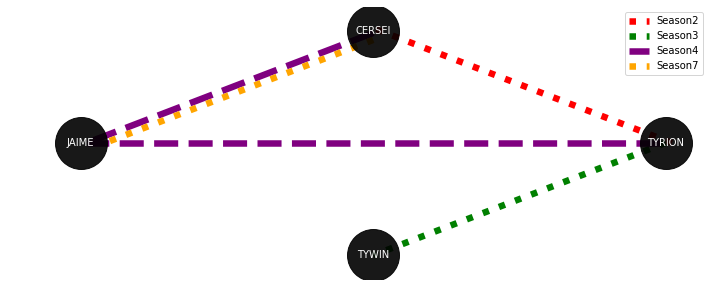

In [6]:
sub2 = mg.subgraph(Lannisters)
weights2_1to7 = np.array([(d['weight']['weight']) for u,v,d in sub2.edges(data=True)])
p2_95 = np.floor(np.percentile(weights2_1to7 , 90))
Poslist2= []
scale2=1
for i in range(7):
    posN2 = nx.shell_layout(sub2, scale=scale2)
    Poslist2.append(posN2)
    scale2-=.02
plt.figure(figsize=(12,5))
nx.draw_networkx_nodes(sub2, Poslist2[2], node_size=2700, node_shape='o', alpha=.9, node_color='black')
nx.draw_networkx_labels(sub2, Poslist2[2], font_size=10, font_color='w')
large2=[]
for i in range(7):
        elarge2 = [(u, v) for (u, v, d) in sub2.edges(data=True) if d['weight']['weight'] >=p2_95 and d['weight']['season']==str(i+1)]
        large2.append(elarge2)
cs = [('b','dotted'),('r','dotted') ,( 'g','dotted'), ('purple','dashed'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
for i in range(7):
    nx.draw_networkx_edges(sub2, Poslist2[i], edgelist=large2[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
plt.legend()
plt.axis('off')
plt.show()
#large2

## Lannisters vs Starks

The Starks weigh down the top 10% for the Lannisters when combined to allow more character interactions to reach the top 10 percent.

Now let's look at soley the interactions for all 7 seasons that are between a Lannister and a Stark. Season 1 is only the interactions between Ned and Cersei. This makes sense since season 1 is dominated by Ned trying to solve the mystery involving Cersei. Season 2 has the most important relationships between Lannisters and Starks. It includes Cersei with Sansa, and Tywin with Arya. The former happens in Kings Landing and the latter happens in the battlefield. Season 3 only involves Sansa with Tyrion. Last season 7 involves Tyrion and Jon. 

One interesting observation is that the Lannisters and Starks stop interacting with high frequency after season 3 and befor season 7. If you combine this fact with the Starks graph missing season 4 and season 5, and the Lannister graph missing season 5 and seaosonm 6, we can deduce the following:

In game of thrones , seasons 1 to 3 are the peak of the Lannister-Stark interaction. Seasn 4 is the peak of the Lannister-Lannister interactions. Season 5 is not meaningfully about the Starks or the Lannisters. Season 6 and season 7 return to foucusing first on the Stark-Stark interactions and then on the Lannister-STark interactions. 



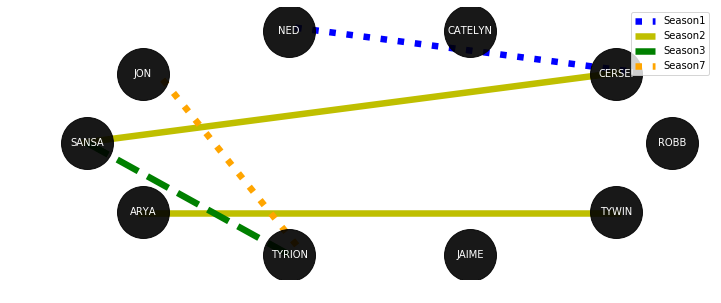

52.0 115.0 73.0


In [7]:
sub3 = mg.subgraph(Main_Char)
weights3_1to7 = np.array([(d['weight']['weight']) for u,v,d in sub3.edges(data=True)])
p3_95 = np.floor(np.percentile(weights3_1to7 , 90))
Poslist3= []
scale3=1
for i in range(7):
    posN3 = nx.shell_layout(sub3, scale=scale3)
    Poslist3.append(posN3)
    scale3-=.02
plt.figure(figsize=(12,5))
nx.draw_networkx_nodes(sub3, Poslist3[2], node_size=2700, node_shape='o', alpha=.9, node_color='black')
nx.draw_networkx_labels(sub3, Poslist3[2], font_size=10, font_color='w')
large3=[]
for i in range(7):
        elarge3 = [(u, v) for (u, v, d) in sub3.edges(data=True) if d['weight']['weight'] >=p3_95 and d['weight']['season']==str(i+1) and checkInteract(u,v)==3]
        large3.append(elarge3)
cs = [('b','dotted'),('y','solid') ,( 'g','dashed'), ('purple','dotted'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
for i in range(7):
    nx.draw_networkx_edges(sub3, Poslist3[i], edgelist=large3[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
plt.legend()
plt.axis('off')
plt.show()
print(p95 , p2_95 , p3_95)